In [1]:
import numpy as np
import pandas as pd
import pickle as pkl
import networkx as nx
import seaborn as sns
import scipy.stats as stats
import matplotlib.pyplot as plt
from multiprocessing import cpu_count
from graspologic.inference import latent_distribution_test
from tqdm import tqdm_notebook as tqdm

/usr/local/lib/python3.9/site-packages/umap/distances.py:1063: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.9/site-packages/umap/distances.py:1071: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  @numba.jit()
/usr/local/lib/python3.9/site-packages/umap/distances.py:1086: NumbaDeprecationWarning: The 'nopython' keyword argument 

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
# corrected = {}
# uncorrected = {}

# for subject1 in np.arange(57):
#     subject1 = subject1 + 1
#     corrected[subject1] = {}
#     uncorrected[subject1] = {}
#     for subject2 in tqdm(np.arange(57)):
#         subject2 = subject2 + 1
#         corrected[subject1][subject2] = {}
#         uncorrected[subject1][subject2] = {}
#         for scan1 in [1, 2]:
#             corrected[subject1][subject2][scan1] = {}
#             uncorrected[subject1][subject2][scan1] = {}
#             for scan2 in [1, 2]:
#                 A = nx.read_graphml(f'../data/DS01216-weighted-directed/subj{subject1}-scan{scan1}.graphml')
#                 B = nx.read_graphml(f'../data/DS00833-weighted-directed/subj{subject2}-scan{scan2}.graphml')

#                 corrected_pval = latent_distribution_test(A, B,
#                                                           test="hsic",
#                                                           metric='gaussian',
#                                                           workers=cpu_count() - 2,
#                                                           size_correction=True).pvalue
#                 uncorrected_pval = latent_distribution_test(A, B,
#                                                           test="hsic",
#                                                           metric='gaussian',
#                                                           workers=cpu_count() - 2,
#                                                           size_correction=False).pvalue

#                 corrected[subject1][subject2][scan1][scan2] = corrected_pval
#                 uncorrected[subject1][subject2][scan1][scan2] = uncorrected_pval

#                 pkl.dump(corrected, open( "../data/corrected_small_large.pkl", "wb" ))
#                 pkl.dump(uncorrected, open( "../data/uncorrected_small_large.pkl", "wb" ))

In [4]:
corrected = pkl.load(open( "../data/real_data_small_large_corrected.pkl", "rb" ))
uncorrected = pkl.load(open( "../data/real_data_small_large_uncorrected.pkl", "rb" ))

In [5]:
same_subject_same_scan_corrected = []
same_subject_diff_scan_corrected = []
diff_subject_diff_scan_corrected = []
same_subject_same_scan_uncorrected = []
same_subject_diff_scan_uncorrected = []
diff_subject_diff_scan_uncorrected = []

for subject1 in np.arange(57):
    subject1 = subject1 + 1
    for subject2 in np.arange(57):
        subject2 = subject2 + 1
        for scan1 in [1, 2]:
            for scan2 in [1, 2]:
                if (subject1 == subject2) and (scan1 == scan2):
                    same_subject_same_scan_corrected.append(corrected[subject1][subject2][scan1][scan2])
                    same_subject_same_scan_uncorrected.append(uncorrected[subject1][subject2][scan1][scan2])
                elif (subject1 == subject2):
                    same_subject_diff_scan_corrected.append(corrected[subject1][subject2][scan1][scan2])
                    same_subject_diff_scan_uncorrected.append(uncorrected[subject1][subject2][scan1][scan2])
                else:
                    diff_subject_diff_scan_corrected.append(corrected[subject1][subject2][scan1][scan2])
                    diff_subject_diff_scan_uncorrected.append(uncorrected[subject1][subject2][scan1][scan2])

In [6]:
len(same_subject_same_scan_corrected), len(same_subject_diff_scan_corrected), len(diff_subject_diff_scan_corrected)

(114, 114, 12768)

In [7]:
len(same_subject_same_scan_uncorrected), len(same_subject_diff_scan_uncorrected), len(diff_subject_diff_scan_uncorrected)

(114, 114, 12768)

## Figure 10

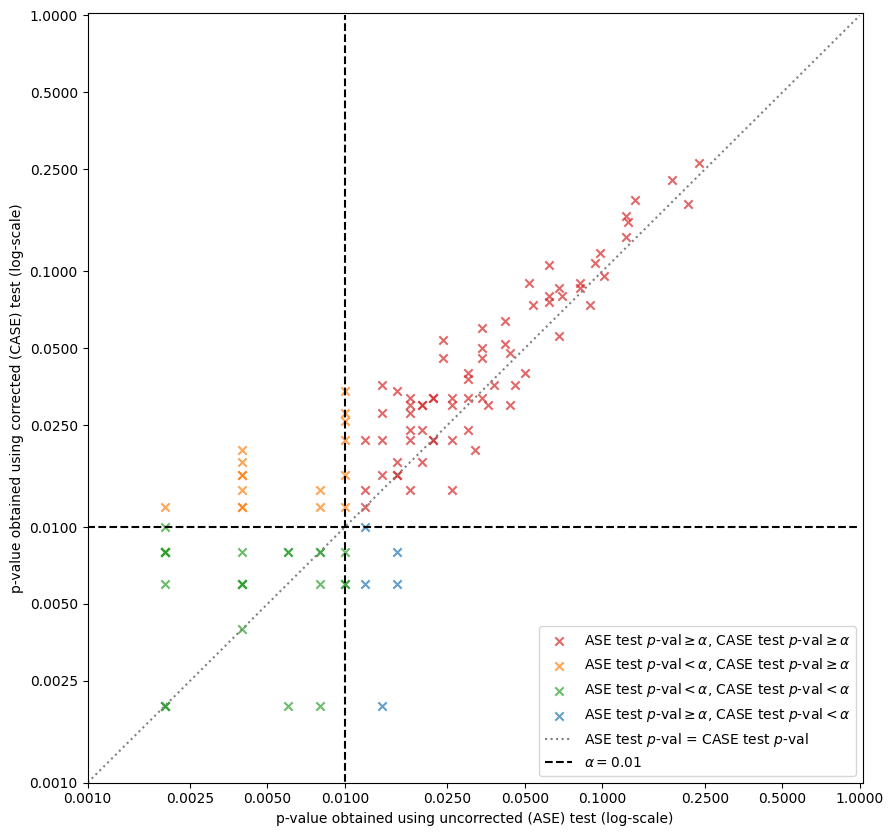

[[69  5]
 [16 24]]


SignificanceResult(statistic=20.7, pvalue=1.0383050546246706e-09)

In [8]:
import matplotlib as mpl
import matplotlib.ticker

from scipy.stats.contingency import crosstab
from scipy.stats import fisher_exact

alpha = 0.01

flag0 = flag1 = flag2 = flag3 = 1

fig1, ax1 = plt.subplots(1, 1, figsize=(10, 10))
for i in range(114):
    if (same_subject_same_scan_uncorrected[i] > alpha) and (same_subject_same_scan_corrected[i] < alpha):
        color='C0'
        ax1.scatter([same_subject_same_scan_uncorrected[i]],
                [same_subject_same_scan_corrected[i]],
                 color=color,
                 label=r'ASE test $p$-val$\geq \alpha$, CASE test $p$-val$< \alpha$' if flag0 else None,
                 marker='x',
                    alpha=0.7,
             )
        flag0 = False
    elif (same_subject_same_scan_uncorrected[i] < alpha) and (same_subject_same_scan_corrected[i] > alpha):
        color='C1'
        ax1.scatter([same_subject_same_scan_uncorrected[i]],
                [same_subject_same_scan_corrected[i]],
                 color=color,
                 label=r'ASE test $p$-val$< \alpha$, CASE test $p$-val$\geq \alpha$' if flag1 else None,
                 marker='x',
                    alpha=0.7,
                   )
        flag1 = False
    elif (same_subject_same_scan_uncorrected[i] < alpha) and (same_subject_same_scan_corrected[i] < alpha):
        color='C2'
        ax1.scatter([same_subject_same_scan_uncorrected[i]],
                [same_subject_same_scan_corrected[i]],
                 color=color,
                 label=r'ASE test $p$-val$< \alpha$, CASE test $p$-val$< \alpha$' if flag2 else None,
                 marker='x',
                 alpha=0.7,
                   )
        flag2 = False
    elif (same_subject_same_scan_uncorrected[i] > alpha) and (same_subject_same_scan_corrected[i] > alpha):
        color='C3'
        ax1.scatter([same_subject_same_scan_uncorrected[i]],
                [same_subject_same_scan_corrected[i]],
                 color=color,
                 label=r'ASE test $p$-val$\geq \alpha$, CASE test $p$-val$\geq \alpha$' if flag3 else None,
                 marker='x',
                 alpha=0.7,
                   )
        flag3 = False

ax1.plot([0, 1], [0, 1], color='gray', linestyle=':', label=r'ASE test $p$-val = CASE test $p$-val')
ax1.plot([0, 1],[alpha, alpha], 'k--', label=r'$\alpha={}$'.format(alpha),)
ax1.plot([alpha, alpha], [0, 1], 'k--')
ax1.set_xscale('log')
ax1.set_yscale('log')
ax1.set_xlim(-0.025, 1.025)
ax1.set_ylim(-0.025, 1.025)
ax1.set_xticks([0.001, 0.0025, 0.005, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1]);
ax1.set_yticks([0.001, 0.0025, 0.005, 0.01, 0.025, 0.05, 0.1, 0.25, 0.5, 1]);
ax1.minorticks_off()
ax1.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.get_yaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax1.set_xlabel("p-value obtained using uncorrected (ASE) test (log-scale)")
ax1.set_ylabel("p-value obtained using corrected (CASE) test (log-scale)")
#ax1.grid(True, which="both")
ax1.legend()
plt.show()
fig1.savefig('../figures/real_data_null_scatter',
             bbox_inches='tight', dpi=600);


binary_uncorrected = np.array(same_subject_same_scan_uncorrected) < alpha
binary_corrected = np.array(same_subject_same_scan_corrected) < alpha
table = crosstab(binary_uncorrected, binary_corrected)[1]
print(table)
res = fisher_exact(table, alternative='two-sided')
res

## Figure 11

In [9]:
comparisons = np.array(same_subject_same_scan_corrected +
                       same_subject_diff_scan_corrected +
                       diff_subject_diff_scan_corrected)
labels = ['same subject same scan'] * 114 + ['same subject diff scan'] * 114 + ['diff subject'] * 12768
histogram_data = pd.DataFrame(data = np.vstack([comparisons, labels]).T,
                              columns=['p-values', 'comparisons'])
histogram_data['p-values'] = histogram_data['p-values'].astype(float)

Mann-Whitney U (one-sided) p-value for same subject same scan vs. same subject diff scan: 0.02038596297491662
Mann-Whitney U (one-sided) p-value for same subject diff scan vs. diff subject: 0.0026478632404536443
Mann-Whitney U (one-sided) p-value for same subject same scan vs. diff subject: 2.0206902648794454e-08


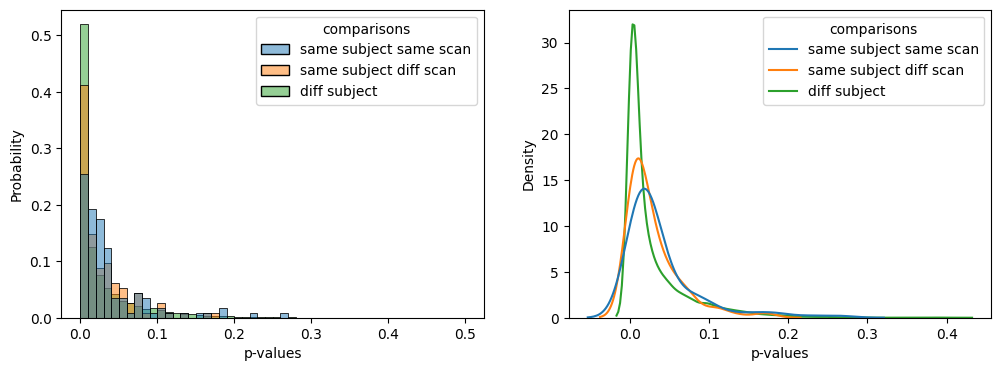

In [10]:
print('Mann-Whitney U (one-sided) p-value for same subject same scan vs. same subject diff scan: {}'.format(
    stats.mannwhitneyu(same_subject_same_scan_corrected,
                       same_subject_diff_scan_corrected,
                       alternative='greater')[1]))
print('Mann-Whitney U (one-sided) p-value for same subject diff scan vs. diff subject: {}'.format(
    stats.mannwhitneyu(same_subject_diff_scan_corrected,
                       diff_subject_diff_scan_corrected,
                       alternative='greater')[1]))
print('Mann-Whitney U (one-sided) p-value for same subject same scan vs. diff subject: {}'.format(
    stats.mannwhitneyu(same_subject_same_scan_corrected,
                       diff_subject_diff_scan_corrected,
                       alternative='greater')[1]))

fig2, (ax21, ax22) = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(histogram_data,
             x='p-values',
             hue='comparisons',
             stat='probability',
             binrange=(0.00, 0.50),
             binwidth=(0.01),
             common_norm=False,
             ax=ax21,
            )
sns.kdeplot(histogram_data,
             x='p-values',
             hue='comparisons',
             common_norm=False,
             ax=ax22,
            )
fig2.savefig('../figures/real_data_alternative',
             bbox_inches='tight', dpi=600);